# Warp the mesh by a field for plotting {#plot_on_warped_mesh}

This example shows how to warp the mesh by a vector field, enabling to
plot on the deformed geometry.


DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  7079 nodes 
  4220 elements 
  Unit: m 
  With solid (3D) elements, shell (2D) elements, shell (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 1 
C

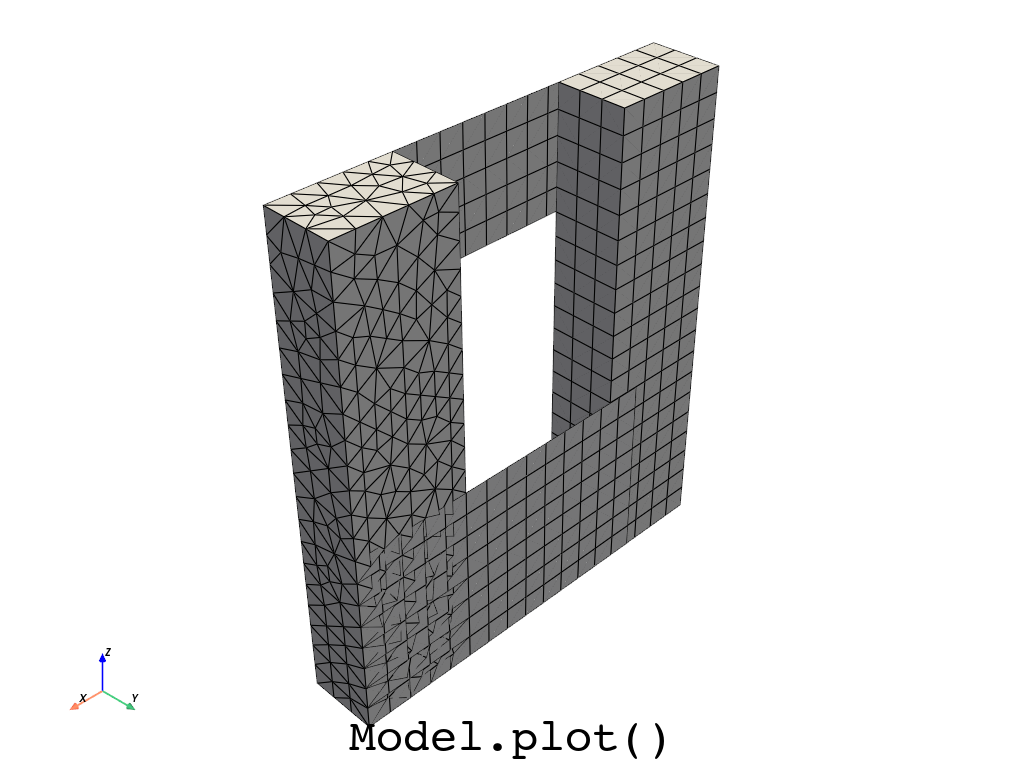

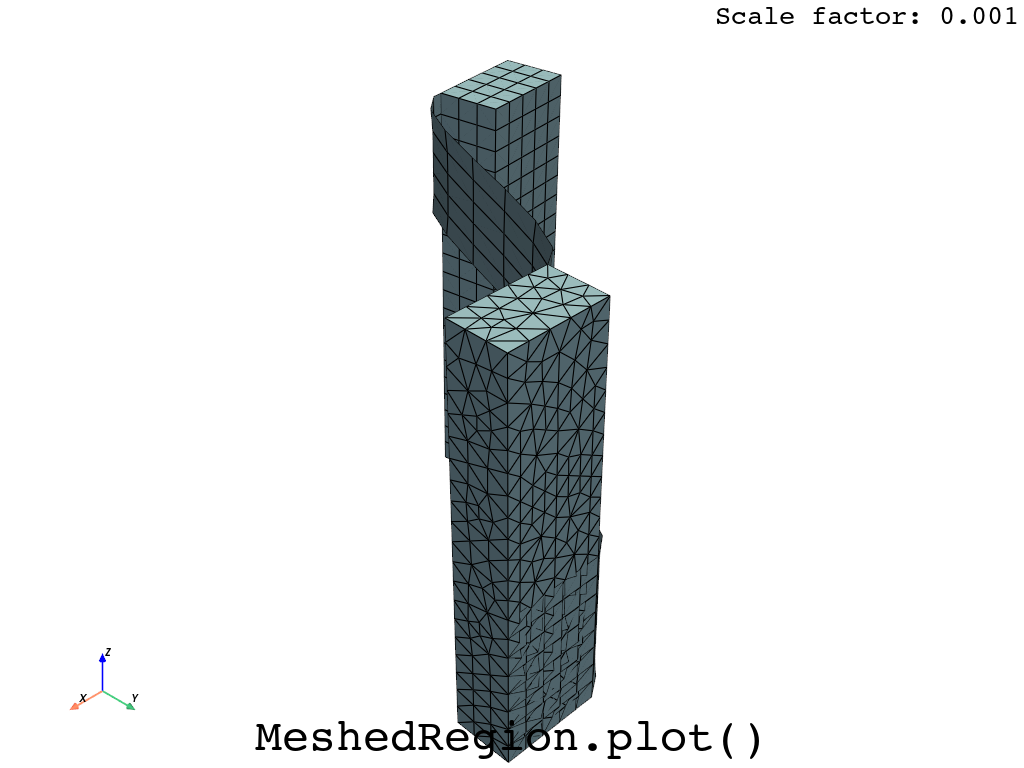

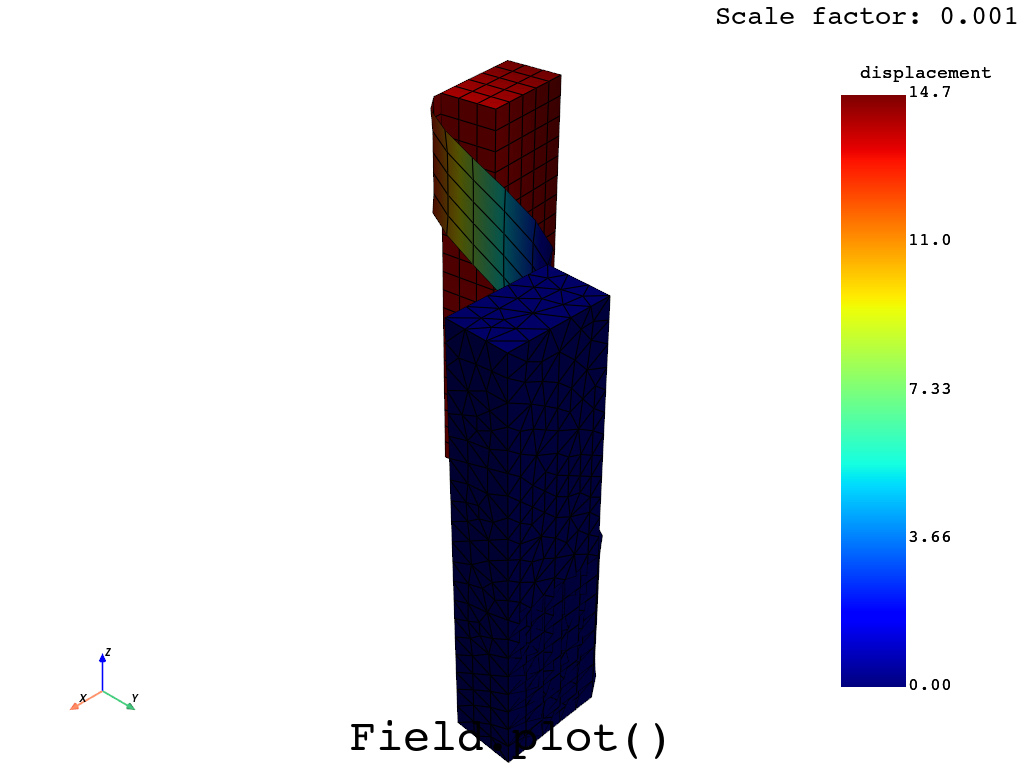

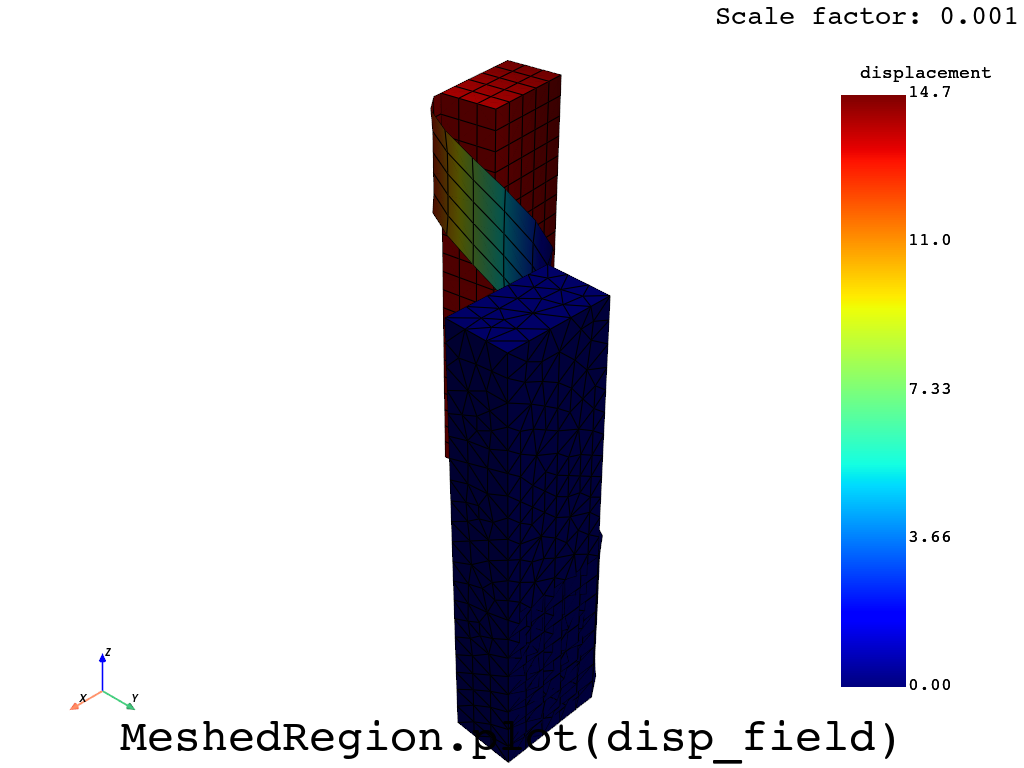

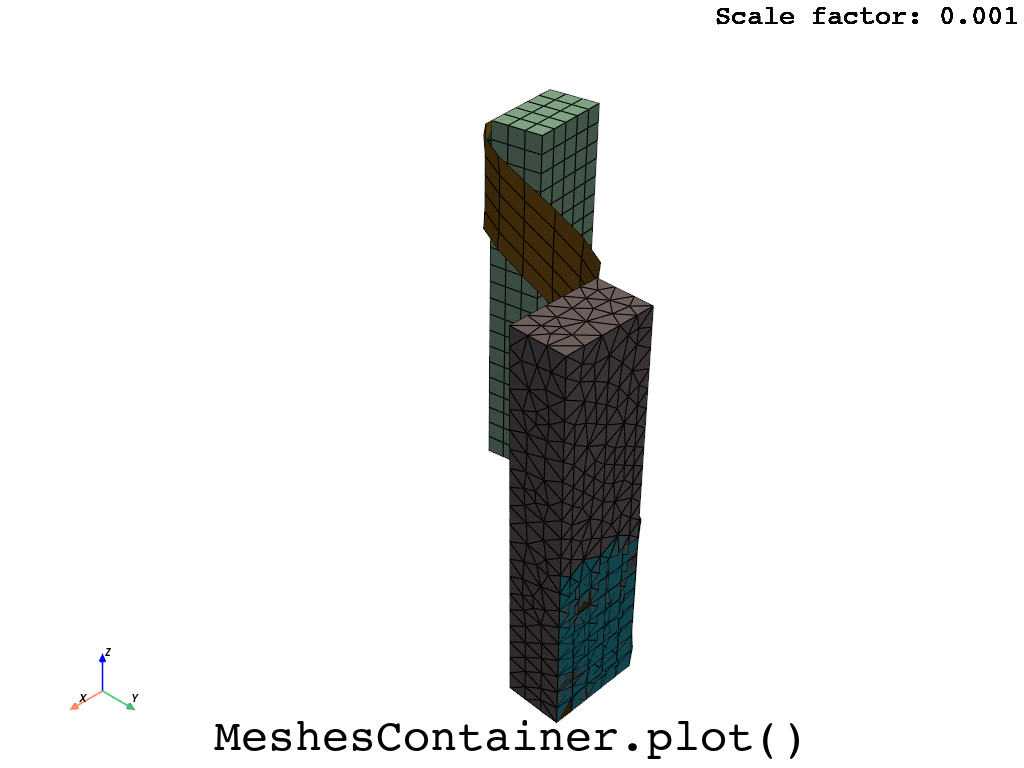

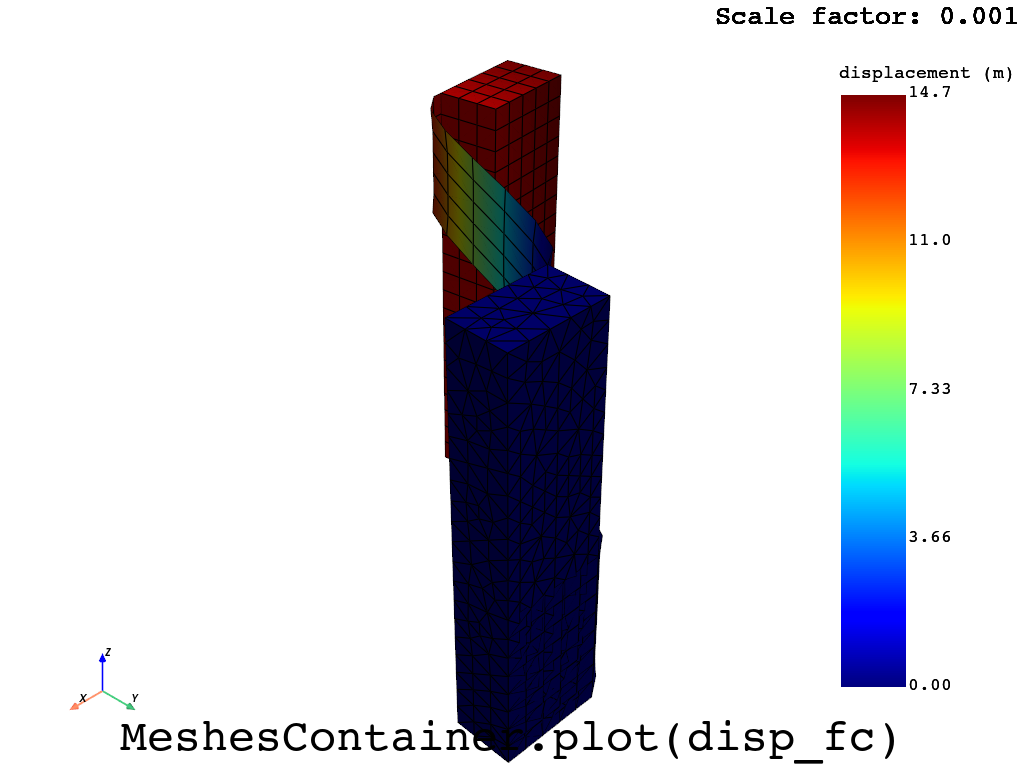

In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples


# Get and show the initial model
model = dpf.Model(examples.find_multishells_rst())
print(model)
model.plot(title="Model", text="Model.plot()")

# Define a scaling factor and a step for the field to be used for warping.
scale_factor = 0.001
step = 1

# Define a result to deform by
disp_result = model.results.displacement.on_time_scoping([step])
disp_op = disp_result()
# Get the displacement field
disp_fc = disp_result.eval()
disp_field = disp_fc[0]

# Get the mesh and plot it as a deformed geometry using a Result, an Operator,
# a Field or a FieldsContainer
mesh = model.metadata.meshed_region
mesh.plot(
    deform_by=disp_result,
    scale_factor=scale_factor,
    title="MeshedRegion",
    text="MeshedRegion.plot()",
)
# mesh.plot(deform_by=disp_op, scale_factor=scale_factor,
#           title='MeshedRegion', text='MeshedRegion.plot()')
# mesh.plot(deform_by=disp_fc, scale_factor=scale_factor,
#           title='MeshedRegion', text='MeshedRegion.plot()')
# mesh.plot(deform_by=disp_field, scale_factor=scale_factor,
#           title='MeshedRegion', text='MeshedRegion.plot()')

# Plot the displacement field on the deformed geometry directly
disp_field.plot(
    deform_by=disp_result, scale_factor=scale_factor, title="Field", text="Field.plot()"
)
# or by applying it to the mesh
mesh.plot(
    disp_field,
    deform_by=disp_result,
    scale_factor=scale_factor,
    title="MeshedRegion",
    text="MeshedRegion.plot(disp_field)",
)

# Split the model by material and plot the deformed MeshesContainer obtained
split_mesh_op = dpf.operators.mesh.split_mesh(mesh=mesh, property="mat")
meshes_cont = split_mesh_op.get_output(0, dpf.types.meshes_container)
meshes_cont.plot(
    deform_by=disp_result,
    scale_factor=scale_factor,
    title="MeshesContainer",
    text="MeshesContainer.plot()",
)

# Create a corresponding FieldsContainer and plot it on the deformed MeshesContainer
disp_op = dpf.operators.result.displacement(
    data_sources=model.metadata.data_sources, mesh=meshes_cont
)
disp_fc = disp_op.outputs.fields_container()
meshes_cont.plot(
    disp_fc,
    deform_by=disp_result,
    scale_factor=scale_factor,
    title="MeshesContainer",
    text="MeshesContainer.plot(disp_fc)",
)